In [1]:
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Script to replicate results presented in "Probabilistic Multi-perspective Application Selection for Safe and Sustainable-by-Design: Method Development and Case Study on Biochar" 
Akshat Sudheshwar, Empa – Swiss Federal Laboratories for Material Science and Technology, Technology and Society Laboratory, Lerchenfeldstrasse 5, 9014 St. Gallen, Switzerland

## 1. Introduction
This jupyter notebook contains the sciprt used to perform the anaylsis presented in the article, **"Probabilistic Multi-perspective Application Selection for Safe and Sustainable-by-Design: Method Development and Case Study on Biochar"**. By modifying the contents of the **input_data**, it is possible to apply the pMPAS approach to any material.
## 2. Input Data 
The input data containing the pplications and there scoring information over different criteria and sub-criteria is stored in the nested dictionary named **inp_data**. Changing the considered applications and their number is possible, i.e. it s possible to introduce more applicationa and sub-criteria and this script will be adapted to a different material and its applications. Here the focus is on biochar and its applicatons. Do note that the information of the scoring distribution for the respective sub-criteria needs to be input in a certain order as commented below in the script.   

In [2]:
inp_data = { #score ditribution valaues take from Table S2 of Supplementary Material
'Soil Amend.':{ #Application 1 for biochar; functionality is the 1st assessment criteria; pH, water retention, etc. are subcriteria
         'Functionality': {'pH Buffering':['Rectangular', 0.5, 1, None], #rectagular distribution selected, values represent upper and lower sampling limits respectively
                            'Water Retention':['Triangular', 0.75, 0, 1], #for triangular distribution, values represent peak, starting and ending value of range respectively
                           'Nutrient Availability':['Triangular', 0.25, -0.5, 1],
                           'Soil Biota':['Rectangular', -1, 1, None],
                          },
         'Safety': {'Toxicity':['Rectangular', -1, 0, None], 
                      'OSH':['Triangular', -0.25, -1, 0.1],
                    'ER':['Triangular', -0.25, -1, 0.1],
                    'HR':['Normal', 0, -0.1, 0.1],
                    'Indirect':['Triangular', 0.25, -0.5, 0.5],
                      },
         'Sustainability': {'Feedstock':['Normal', 0.1, -0.4, 0.6], #for normal distribution, values represent mean (peak), starting and ending value of range respectively
                            'Carbon Footprint':['Triangular', 0.5, -1, 1],
                            'Lifesapn':['Triangular', 0, -0.1, 0.1], #please note that lifesapn was renamed to sub-criteria 'Delayed Release' in later drafts of the manscript
                            'EoL':['Normal', 0.25, -0.25, 0.75],
                            'Indirect':['Triangular', 0.25, -0.5, 1],
                           },
         'Economic': {'Direct Costs':['Rectangular', -1, 0, None], 
                      'Certification':['Rectangular', -1, 0, None],
                      'Indirect':['Triangular', 0.25, -0.5, 1],
                      },
        },
'Animal Feed':{ 
         'Functionality': {'Health Enhancement':['Normal', 0.5, 0, 1], 
                          },
         'Safety': {'Toxicity':['Normal', 0, -0.1, 0.1], 
                      'OSH':['Normal', 0, -0.1, 0.1],
                    'ER':['Normal', 0, -0.1, 0.1],
                    'HR':['Normal', 0, -0.1, 0.1],
                    'Indirect':['Normal', 0.5, 0, 1],
                      },
         'Sustainability': {'Feedstock':['Rectangular', -1, 0, None], 
                            'Carbon Footprint':['Triangular', 0.1, -1, 1],
                            'Lifesapn':['Triangular', 0, -0.1, 0.1],
                            'EoL':['Normal', 0.25, -0.25, 0.75],
                            'Indirect':['Triangular', 0.5, 0, 1],
                           },
         'Economic': {'Direct Costs':['Triangular', 0.1, -1, 1], 
                      'Certification':['Rectangular', -1, -0.9, None],
                      'Indirect':['Normal', 0.5, 0, 1],
                      },
        },
'Pass. Cool.':{ 
         'Functionality': {'Food Preservation':['Triangular', 0.3, -0.1, 1], 
                          },
         'Safety': {'Toxicity':['Rectangular', -1, 0, None], 
                      'OSH':['Triangular', -0.25, -1, 0.1],
                    'ER':['Triangular', -0.25, -1, 0.1],
                    'HR':['Triangular', -0.2, -1, 0],
                    'Indirect':['Triangular', 0.25, -0.5, 0.5],
                      },
         'Sustainability': {'Feedstock':['Normal', 0.1, -0.4, 0.6], 
                            'Carbon Footprint':['Triangular', 0.5, -1, 1],
                            'Lifesapn':['Triangular', 0.2, 0, 0.5],
                            'EoL':['Rectangular', -1, 0.75, None],
                            'Indirect':['Triangular', 0.25, 0, 1],
                           },
         'Economic': {'Direct Costs':['Rectangular', 0, 1, None], 
                      'Certification':['Rectangular', 0, 1, None],
                      'Indirect':['Triangular', 0.3, -0.1, 1],
                      },
        },
'Fuel':{ 
         'Functionality': {'Calorific Value':['Rectangular', -1, 0, None],
                           'Combustion Efficiency':['Normal', 0.1, -0.4, 0.6],
                          },
         'Safety': {'Toxicity':['Rectangular', 0, 1, None], 
                      'OSH':['Triangular', -0.25, -1, 0.1],
                    'ER':['Triangular', -0.25, -1, 0.1],
                    'HR':['Triangular', -0.2, -1, 0],
                    'Indirect':['Normal', 0.5, 0, 1],
                      },
         'Sustainability': {'Feedstock':['Normal', 0.1, -0.4, 0.6], 
                            'Carbon Footprint':['Rectangular', -1, 0, None],
                            'Lifesapn':['Rectangular', -1, 0, None],
                            'EoL':['Rectangular', -1, 0, None],
                            'Indirect':['Rectangular', -1, 0, None],
                           },
         'Economic': {'Direct Costs':['Rectangular', -1, 1, None], 
                      #'Certification':['Rectangular', 0, 1, None], #Omitted as not relevant
                      'Indirect':['Rectangular', -1, 0.9, None],
                      },
        },
'Electrode':{ 
         'Functionality': {'Electrical Performance':['Triangular', -0.25, -1, 0],
                          },
         'Safety': {'Toxicity':['Rectangular', -1, 0, None], 
                      'OSH':['Triangular', -0.5, -1, 0.1],
                    'ER':['Triangular', 0.25, -0.5, 1],
                    'HR':['Triangular', 0.25, -0.5, 1],
                    #'Indirect':['Normal', 0, -0.5, 0.5],
                      },
         'Sustainability': {'Feedstock':['Rectangular', -1, 0, None], 
                            'Carbon Footprint':['Triangular', 0, -0.5, 0.75],
                            'Lifesapn':['Triangular', 0.2, 0, 0.5],
                            'EoL':['Normal', -0.5, -1, 0],
                            'Indirect':['Triangular', 0.25, -0.5, 1],
                           },
         'Economic': {'Direct Costs':['Triangular', 0.5, -0.5, 1], 
                      'Certification':['Rectangular', -1, 0, None], 
                      'Indirect':['Rectangular', -1, 1, None],
                      },
        },
'Reductant':{ 
         'Functionality': {'Reducing Agent':['Rectangular', -1, 0.5, None],
                           
                          },
         'Safety': {'Toxicity':['Rectangular', 0, 1, None], 
                      'OSH':['Triangular', -0.25, -1, 0.1],
                    'ER':['Triangular', -0.25, -1, 0.1],
                    'HR':['Triangular', -0.2, -1, 0],
                    'Indirect':['Normal', 0.5, 0, 1],
                      },
         'Sustainability': {'Feedstock':['Rectangular', -1, 0, None], 
                            'Carbon Footprint':['Rectangular', -1, 0, None],
                            'Lifesapn':['Rectangular', -1, 0, None],
                            'EoL':['Rectangular', -1, 0, None],
                            'Indirect':['Rectangular', -1, 0, None],
                           },
         'Economic': {'Direct Costs':['Rectangular', -1, 1, None], 
                      #'Certification':['Rectangular', 0, 1, None], #Omitted as not relevant
                      'Indirect':['Rectangular', -1, 0.9, None],
                      },
        },
'Cement Add.':{ 
         'Functionality': {'Strength':['Triangular', -0.1, -0.5, 0.5],
                           'Life':['Rectangular', -1, 1, None],
                           
                          },
         'Safety': {'Toxicity':['Rectangular', -1, 0, None], 
                      'OSH':['Triangular', -0.25, -1, 0.1],
                    'ER':['Triangular', 0.25, -0.5, 1],
                    'HR':['Triangular', 0.25, -0.5, 1],
                    'Indirect':['Triangular', 0.5, -1, 1],
                      },
         'Sustainability': {'Feedstock':['Normal', 0.1, -0.4, 0.6],
                            'Carbon Footprint':['Triangular', 0.5, 0, 1],
                            'Lifesapn':['Triangular', 0.5, 0, 1],
                            'EoL':['Normal', 0, -1, 1],
                            'Indirect':['Rectangular', 0.1, 0.2, None],
                           },
         'Economic': {'Direct Costs':['Rectangular', -0.5, 0, None], 
                      'Certification':['Rectangular', -1, 0, None], 
                      'Indirect':['Triangular', 0.75, 0, 1],
                      },
        },
'Conc. Agg.':{ 
         'Functionality': {'Strength':['Triangular', -0.1, -0.5, 0.5],
                           'Life':['Rectangular', -1, 1, None],
                           'Weight':['Rectangular', 0.1, 0.2, None],
                           },
         'Safety': {'Toxicity':['Rectangular', -1, 0, None], 
                      'OSH':['Triangular', -0.25, -1, 0.1],
                    'ER':['Triangular', 0.25, -0.5, 1],
                    'HR':['Triangular', 0.25, -0.5, 1],
                    'Indirect':['Triangular', 0.5, -1, 1],
                      },
         'Sustainability': {'Feedstock':['Normal', 0.1, -0.4, 0.6],
                            'Carbon Footprint':['Triangular', 0.5, 0, 1],
                            'Lifesapn':['Triangular', 0.5, 0, 1],
                            'EoL':['Normal', 0, -1, 1],
                            'Indirect':['Rectangular', 0.1, 0.2, None],
                           },
         'Economic': {'Direct Costs':['Rectangular', -0.5, 0, None], 
                      'Certification':['Rectangular', -1, 0, None], 
                      'Indirect':['Triangular', 0.75, 0, 1],
                      },
        },
'Plastic Add.':{ 
         'Functionality': {'Strength':['Rectangular', -0.25, 0, None],
                           'Colorant':['Rectangular', -0.1, 0.1, None],
                           },
         'Safety': {'Toxicity':['Rectangular', -1, 0, None], 
                    'OSH':['Triangular', -0.25, -1, 0.1],
                    'ER':['Triangular', -0.1, -1, 0],
                    'HR':['Triangular', -0.3, -1, 0],
                    #'Indirect':['Triangular', 0.5, -1, 1],
                      },
         'Sustainability': {'Feedstock':['Rectangular', -1, 0, None],
                            'Carbon Footprint':['Triangular', 0.5, -1, 1],
                            'Lifesapn':['Triangular', 0.1, 0, 0.3],
                            'EoL':['Normal', -0.5, -1, 0],
                            #'Indirect':['Rectangular', 0.1, 0.2, None],
                           },
         'Economic': {'Direct Costs':['Rectangular', -1, 1, None], 
                      'Certification':['Rectangular', -1, 0, None], 
                      'Indirect':['Rectangular', -1, 1, None],
                      },
        },
'Catalyst':{ 
         'Functionality': {'Catalyst':['Triangular', 0.2, -1, 1],
                           'Carrier':['Triangular', 0.4, -1, 1],
                           },
         'Safety': {'Toxicity':['Rectangular', -1, 0, None], 
                     'OSH':['Triangular', -0.5, -1, 0.1],
                    'ER':['Triangular', 0.25, -0.5, 1],
                    'HR':['Triangular', 0.25, -0.5, 1],
                    #'Indirect':['Triangular', 0.5, -1, 1],
                      },
         'Sustainability': {'Feedstock':['Rectangular', -1, 0, None],
                            'Carbon Footprint':['Triangular', 0.5, -1, 1],
                            'Lifesapn':['Triangular', 0.1, 0, 0.3],
                            'EoL':['Normal', -0.25, -1, 0.5],
                            'Indirect':['Rectangular', 0, 1, None],
                           },
         'Economic': {'Direct Costs':['Rectangular', 0, 1, None], 
                      'Certification':['Rectangular', -1, 0, None], 
                      #'Indirect':['Rectangular', -1, 1, None],
                      },
        },
'Carbon Nano.':{ 
         'Functionality': {'Carbon Content':['Rectangular', -1, 0, None],
                          
                           },
         'Safety': {'Toxicity':['Rectangular', -1, -0.5, None], 
                     'OSH':['Triangular', -0.5, -1, 0.1],
                    'ER':['Triangular', -0.25, -1, 0.1],
                    'HR':['Triangular', -0.25, -1, 0.1],
                    #'Indirect':['Triangular', 0.5, -1, 1],
                      },
         'Sustainability': {'Feedstock':['Rectangular', -1, 0, None],
                            'Carbon Footprint':['Triangular', 0, -1, 0.5],
                            'Lifesapn':['Triangular', 0.1, 0, 0.3],
                            'EoL':['Normal', -0.25, -1, 0.5],
                            'Indirect':['Rectangular', 0, 1, None],
                           },
         'Economic': {'Direct Costs':['Rectangular', 0, 1, None], 
                      'Certification':['Rectangular', -1, 0, None], 
                      #'Indirect':['Rectangular', -1, 1, None],
                      },
        },
'Env. Rem.':{ 
         'Functionality': {'Remedition':['Triangular', 0.25, -0.5, 0.5],
                          
                           },
         'Safety': {'Toxicity':['Normal', 0, -0.1, 0.1], 
                      'OSH':['Normal', 0, -0.1, 0.1],
                    'ER':['Normal', 0, -0.1, 0.1],
                    'HR':['Normal', 0, -0.1, 0.1],
                    'Indirect':['Rectangular', -1, 0, None],
                      },
         'Sustainability': {'Feedstock':['Normal', 0.1, -0.4, 0.6],
                            'Carbon Footprint':['Triangular', 0, -0.5, 0.75],
                            'Lifesapn':['Triangular', 0, -0.1, 0.1],
                            'EoL':['Normal', 0.25, -0.25, 0.75],
                            #'Indirect':['Rectangular', 0, 1, None],
                           },
         'Economic': {'Direct Costs':['Rectangular', -1, 1, None], 
                      'Certification':['Rectangular', -1, -0.9, None], 
                      #'Indirect':['Rectangular', -1, 1, None],
                      },
        },
'Water Treat.':{ 
         'Functionality': {'Adsoprtion':['Normal', 0, -0.1, 0.1],
                          
                           },
         'Safety': {'Toxicity':['Normal', 0, -0.1, 0.1], 
                      'OSH':['Normal', 0, -0.1, 0.1],
                    'ER':['Normal', 0, -0.1, 0.1],
                    'HR':['Normal', 0, -0.1, 0.1],
                    #'Indirect':['Rectangular', -1, 0, None],
                      },
         'Sustainability': {'Feedstock':['Normal', 0.1, -0.4, 0.6],
                            'Carbon Footprint':['Triangular', 0, -0.5, 0.75],
                            'Lifesapn':['Triangular', 0.1, 0, 0.3],
                            'EoL':['Normal', -0.25, -1, 0.5],
                            #'Indirect':['Rectangular', 0, 1, None],
                           },
         'Economic': {'Direct Costs':['Rectangular', -1, 1, None], 
                      'Certification':['Rectangular', -1, -0.9, None], 
                      #'Indirect':['Rectangular', -1, 1, None],
                      },
        },
'Gas Sorb.':{ 
         'Functionality': {'Adsoprtion':['Normal', 0, -0.1, 0.1],
                          
                           },
         'Safety': {'Toxicity':['Normal', 0, -0.1, 0.1], 
                      'OSH':['Normal', 0, -0.1, 0.1],
                    'ER':['Normal', 0, -0.1, 0.1],
                    'HR':['Normal', 0, -0.1, 0.1],
                    #'Indirect':['Rectangular', -1, 0, None],
                      },
         'Sustainability': {'Feedstock':['Normal', 0.1, -0.4, 0.6],
                            'Carbon Footprint':['Triangular', 0, -0.5, 0.75],
                            'Lifesapn':['Triangular', 0.1, 0, 0.3],
                            'EoL':['Normal', -0.25, -1, 0.5],
                            #'Indirect':['Rectangular', 0, 1, None],
                           },
         'Economic': {'Direct Costs':['Rectangular', -1, 1, None], 
                      'Certification':['Rectangular', -1, -0.9, None], 
                      #'Indirect':['Rectangular', -1, 1, None],
                      },
        },
'Bioreac. Add.':{ 
         'Functionality': {'Support':['Triangular', 0.25, -1, 1],
                          
                           },
         'Safety': {'Toxicity':['Rectangular', -1, 0, None], 
                      'OSH':['Triangular', -0.25, -1, 0.1],
                    'ER':['Triangular', -0.25, -1, 0.1],
                    'HR':['Normal', 0, -0.1, 0.1],
                    #'Indirect':['Rectangular', -1, 0, None],
                      },
         'Sustainability': {'Feedstock':['Normal', 0.1, -0.4, 0.6], 
                            'Carbon Footprint':['Triangular', 0.5, -1, 1],
                            'Lifesapn':['Triangular', 0, -0.1, 0.1],
                            'EoL':['Normal', 0.25, -0.25, 0.75],
                            'Indirect':['Rectangular', 0, 1, None],
                           },
         'Economic': {'Direct Costs':['Rectangular', -1, 0, None], 
                      'Certification':['Rectangular', -1, 0, None], 
                      #'Indirect':['Rectangular', -1, 1, None],
                      },
        },
}    

clrs = {'Soil Amend.':'indianred','Animal Feed':'indianred', #color scheme corresponding to each application
        'Pass. Cool.':'maroon', 
        'Fuel':'goldenrod', 'Electrode':'goldenrod', 
        'Reductant':'black', 
        'Cement Add.':'gray', 'Conc. Agg.':'gray', 
        'Plastic Add.':'teal',
        'Catalyst':'darkorange', 
        'Carbon Nano.':'mediumorchid', 
        'Env. Rem.':'mediumseagreen', 'Water Treat.':'mediumseagreen', 'Gas Sorb.':'mediumseagreen', 'Bioreac. Add.':'mediumseagreen'}

## 3. Monte Carlo Simluations & pMPAS Distributions
After supplying all input data, the following ufnctions may be invoked to carry out the necessary simulations and compile the ditsributions for the critieria along with the pMPAS for each application. Function **inp_data_simulator()** accepts **inp_data** as an argument and performs all the necessary operations to produce the final nested dictionary with all the relevant data. This script only utilizes 3 distributions: **rectangular, normal, and skewed** from the scipy library as evident from **sub_criteria_scoring()**. By first **averaging out the distributions for each sub-criteria**, we obtain the **mean distributions for the criteria**.

In [3]:
def sub_criteria_scoring(inp_data_application_criteria): #functions uses the distribution information specified for subcriteira to perform monte-calro simulations; it accepts the list containing the information as the input argument
    dist = {}
    num_points = 100000 #specify number of montecarlo simualtions
    for k,v in inp_data_application_criteria.items():
        if v[0] == 'Rectangular':
            dist[k] = np.random.uniform(low= v[1], high= v[2], size=num_points)
        elif v[0] == 'Normal':
            dist[k] = stats.norm.rvs(v[1], abs(v[3]-v[2])/6, size=num_points)
        elif v[0] == 'Triangular':
            dist[k] = stats.triang.rvs(loc=v[2], c =  (v[1] - v[2])/(v[3] - v[2]), scale= abs(v[3]-v[2]), size=num_points)  #start, peak, range
    return dist

In [4]:
def inp_data_simulator(inp_data):  #function takes in the input data as argument, performs the monte carlo simulations in the background, and returns the output dictionary with the mean criteria and pMPAS scores per application 
    ###################################################This is the simualtion of scores for sub criteria
    op_data_2 = {}
    for application in inp_data.keys():
        op_data_1 = {}
        for criteria in inp_data[application].keys():
            op_data_1[criteria] = sub_criteria_scoring(inp_data[application][criteria])
        #print(op_data_1, application)
        op_data_2[application] = op_data_1
    #return op_data_2
    ####################################################This is the to compute the distribtuns of means and compute the final pMPAS distribution
    pmpas_scores_application = {}
    for application in op_data_2.keys():
        pmpas_scores_criteria = {}
        temp_lst_2 = [] #for final pMPAS score
        for criteria in op_data_2[application].keys():
            temp_lst = [] #for criteria scores
            for subcriteria in op_data_2[application][criteria]:
                #print(op_data_2[application][criteria][subcriteria],subcriteria, criteria, application)
                temp_lst.append(op_data_2[application][criteria][subcriteria])
                temp_lst_2.append(op_data_2[application][criteria][subcriteria])
                #print('temp:::::::', temp_lst,subcriteria, criteria)
            pmpas_scores_criteria[criteria] = np.mean(np.array(temp_lst), axis=0) #calulating mean scores for each criteira
            #print('\nmean sub:::::::', pmpas_scores_criteria, subcriteria, criteria, application)
        pmpas_scores_application[application] = pmpas_scores_criteria
        pmpas_scores_application[application]['pMPAS'] = np.mean(np.array(temp_lst_2), axis=0) #calcualting final pMPAS distribution based on the scoring of all other criteria
    #print('\npmas:::::',pmpas_scores_application)
    return pmpas_scores_application

In [5]:
pmpas_scores_application = inp_data_simulator(inp_data) #output dictionary with final mean distributions

## 4. Plotting Distributions
**Averaging out the criteria distributions yields the pMPAS distribution**. The distrubtions for each assesssemnt critieria along with the pMPAS distribution are plotted for each application and saved as an image in **output1.svg** using the functions below.

In [6]:
def all_criteria_plots(pmpas_scores_application):
    #a1 = ['Soil Amend.','Animal Feed','Passive Cool.','Fuel', 'Electrode','Reductant','Cement Add.', 'Concrete Agg.']
    #a2 = [ 'Plastic Add.', 'Catalyst','Carbon Nano.','Env. Remediation', 'Water Treat.', 'Gas Sorb.', 'Bioreactor Add.']
    #cols = len(pmpas_scores_application['Soil Amend.'])-1
    cols = len(pmpas_scores_application['Soil Amend.'])
    rows = len(pmpas_scores_application)
    #rows = len(a1)
    #rows = len(a2)
    
    #fig, axes = plt.subplots(rows, cols, figsize=(4*cols,2*rows), sharex = True, sharey = True)
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols,2*rows), sharex = True)
    plt.subplots_adjust(wspace=0, hspace=0)
    for (i, application) in zip(range(rows), pmpas_scores_application):
    #for (i, application) in zip(range(rows), a2):
        for (j, category) in zip(range(cols), pmpas_scores_application[application].keys()):
            sns.kdeplot(pmpas_scores_application[application][category], ax = axes[i][j], fill = True , color = clrs[application])
            #plt.xticks(fontsize=14, rotation=90)
            #axes[i][j].set_title('{}, {}'.format(application, category), fontsize=15)
            if i == 0:
                #axes[i][j].set_title('{}, {}'.format(application, category), fontsize=15)
                axes[i][j].set_title(category, fontsize=16)
            if j == 0:
                axes[i][j].set_ylabel(application, fontsize =16)
            else:
                axes[i][j].get_yaxis().set_visible(False)
            
            axes[i][j].set_xlim(-1.15,1.15)
            axes[i][j].set(yticklabels=[])
            axes[i][j].tick_params(left=False, which='both', width=3)
            axes[i][j].axvline(x=0, color='black', linestyle='--', alpha = 0.5)
            axes[i][j].axvline(x=0.5, color='black', linestyle=':', alpha = 0.2)
            axes[i][j].axvline(x=1, color='black', linestyle=':', alpha = 0.2)
            axes[i][j].axvline(x=-0.5, color='black', linestyle=':', alpha = 0.2)
            axes[i][j].axvline(x=-1, color='black', linestyle=':', alpha = 0.2)
            axes[i][j].tick_params('x', labelsize=15)
            #axes[i][j].set(xticklabels=[-1, -0.5, 0, 0.5, 1])
            #axes[i][j].set_xticks(range(5), labels=[-1, -0.5, 0, 0.5, 1])
            if j == 4:
                axes[i][j].text(0.2, ((((pmpas_scores_application[application]['pMPAS'] == pmpas_scores_application[application]['pMPAS'].mean())).mean()*100)+3),
                #axes[i][j].text(0.27, 5,
                                'score = {:.0f}%'.format((pmpas_scores_application[application]['pMPAS'] > 0).mean()*100),
                                fontsize = 14,          # Size
                                fontstyle = "oblique",  # Style
                                color = clrs[application])

    #plt.savefig('output1.svg', bbox_inches = 'tight',pad_inches = 0)
    #plt.savefig('output1.jpg', bbox_inches = 'tight',pad_inches = 0)    
    #plt.savefig('output1_1.svg', bbox_inches = 'tight',pad_inches = 0)
    #plt.savefig('output1_1.jpg', bbox_inches = 'tight',pad_inches = 0)
    plt.savefig('fig3.svg', bbox_inches = 'tight',pad_inches = 0.01)
    plt.savefig('fig3.jpg', bbox_inches = 'tight',pad_inches = 0.01)

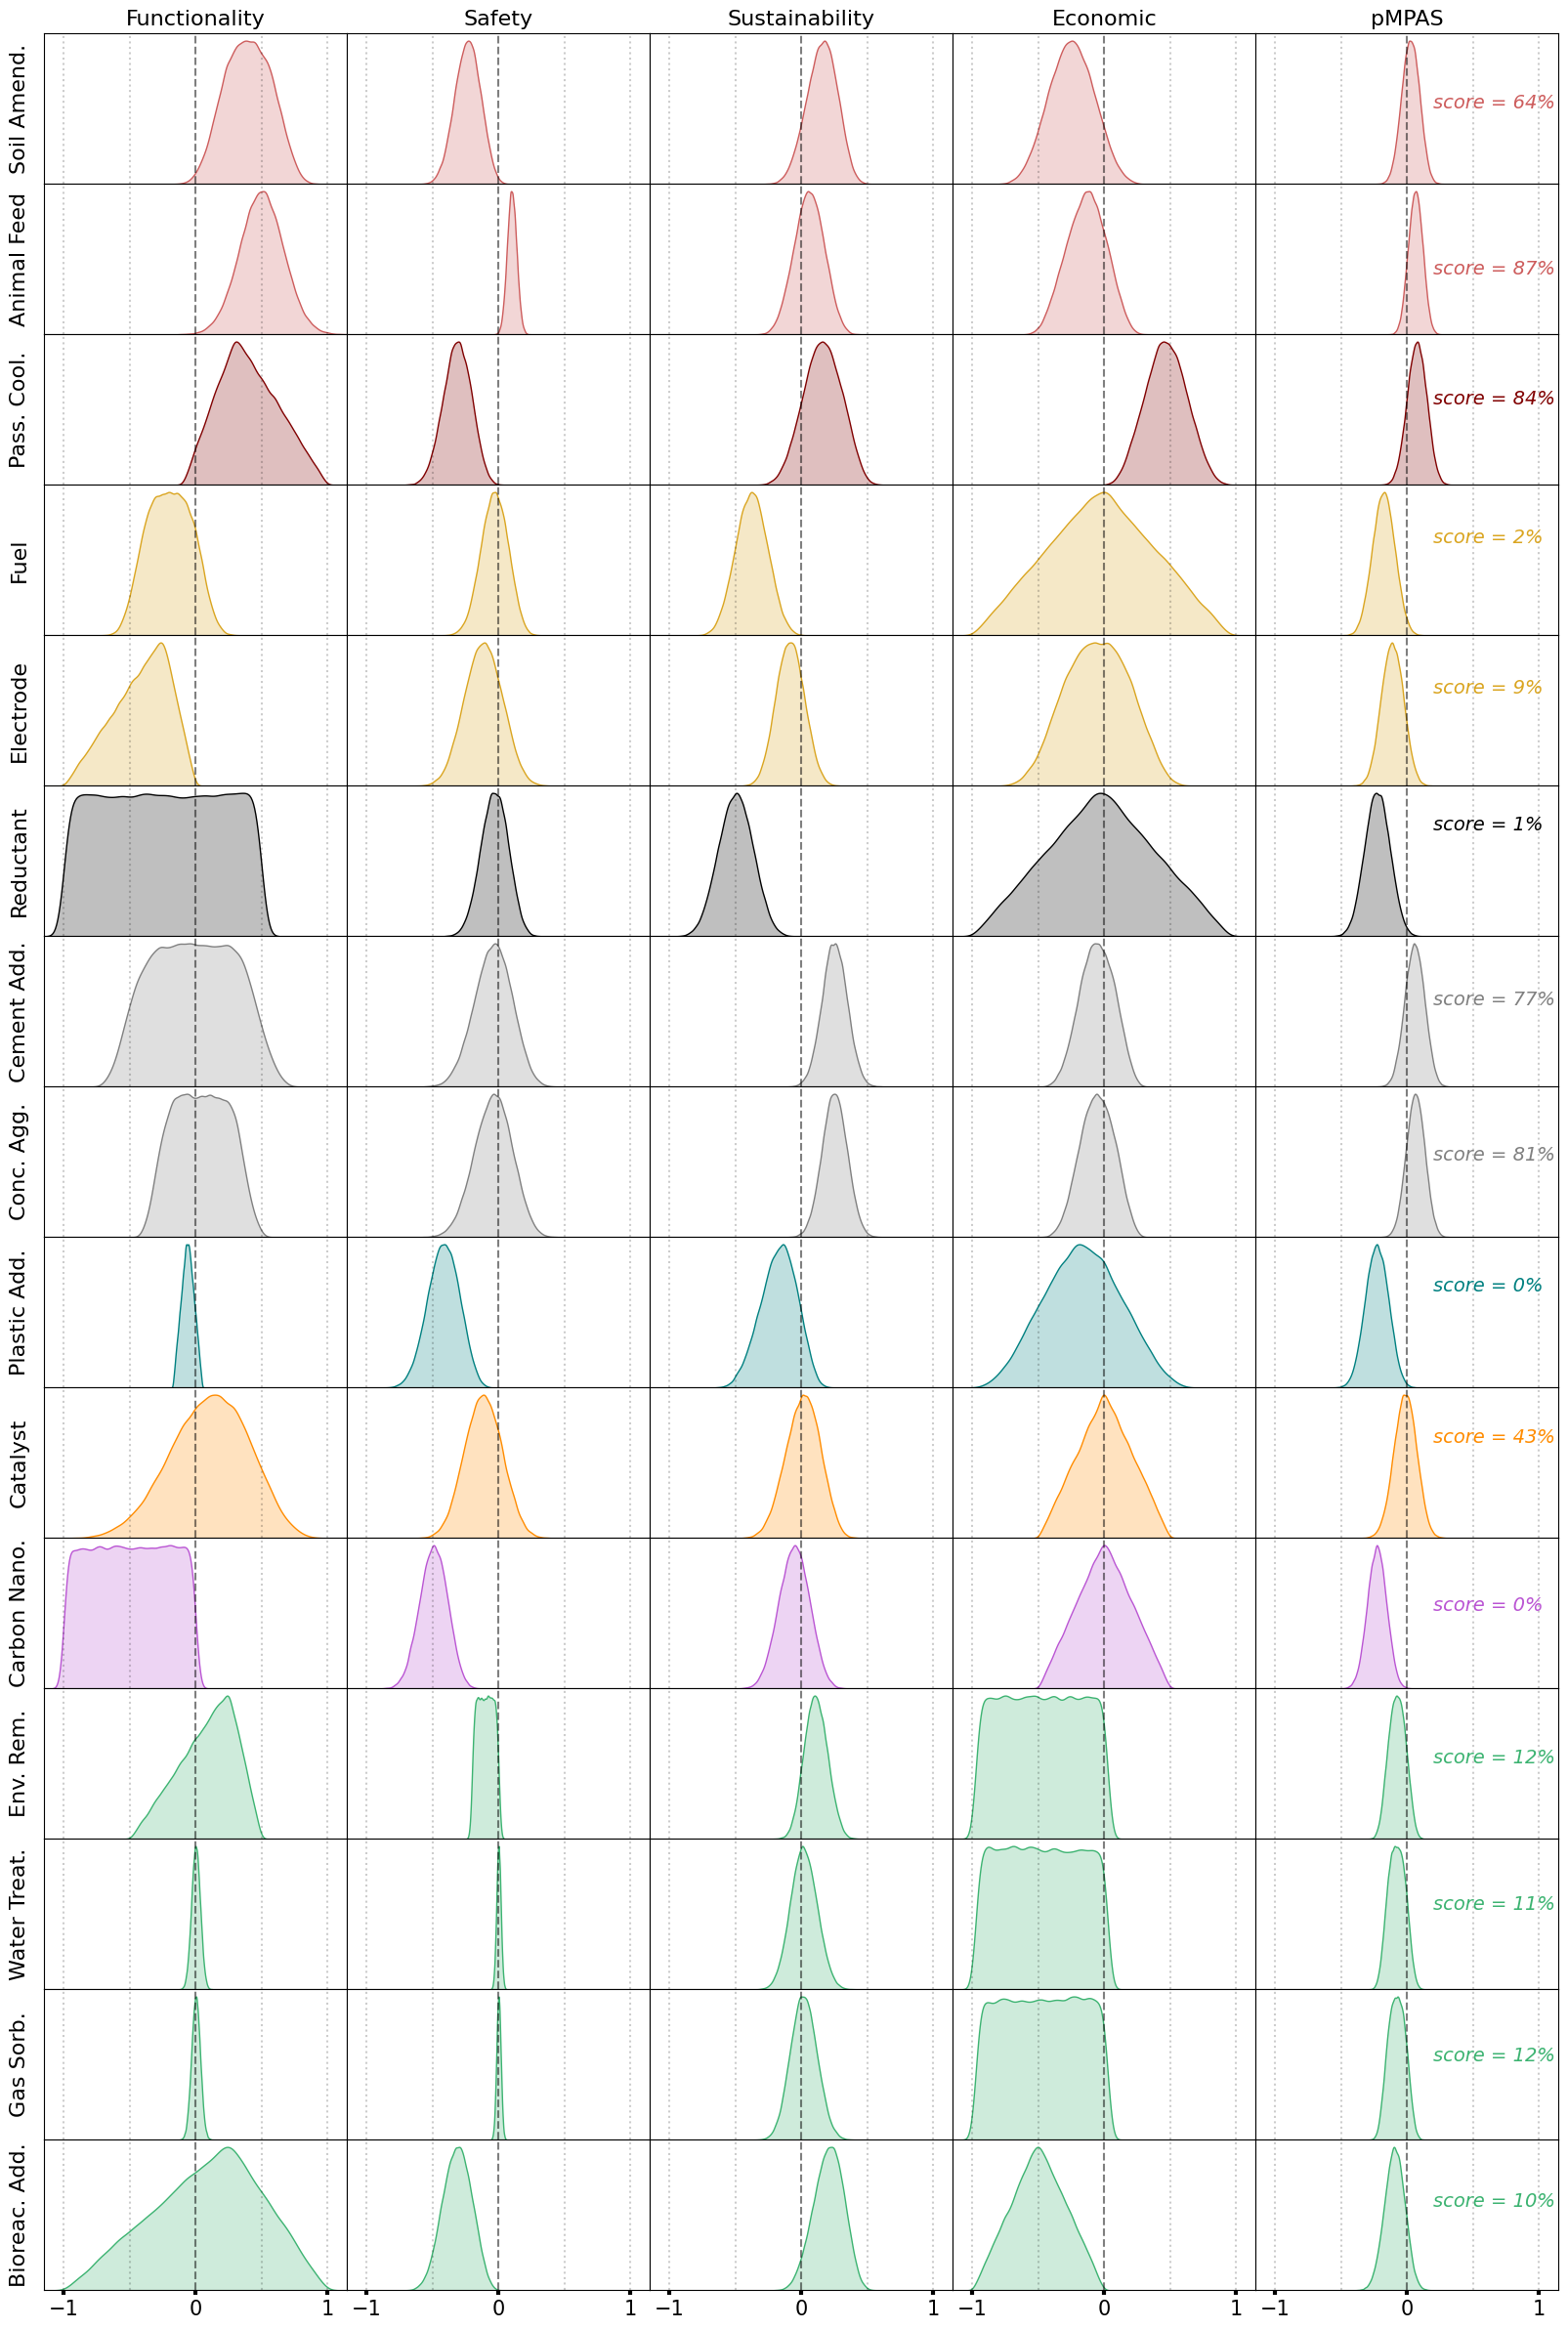

In [7]:
all_criteria_plots(pmpas_scores_application)

## 5. Final pMPAS Score
From pMPAS distribution depicted above, the final **pMPAS score** is caluculated by estimating the **probability of pMPAS distrubtion for each application lying above the decision boundary (0 in this assessment)**. The final results are also saved as figure in **output2.svg** and the table is saved as **pMPAS_results.csv**.

      Application  pMPAS Score
0     Animal Feed      0.86836
1     Pass. Cool.      0.83527
2      Conc. Agg.      0.80831
3     Cement Add.      0.76882
4     Soil Amend.      0.63793
5        Catalyst      0.42958
6       Env. Rem.      0.11967
7       Gas Sorb.      0.11500
8    Water Treat.      0.11221
9   Bioreac. Add.      0.10266
10      Electrode      0.08659
11           Fuel      0.01533
12      Reductant      0.00648
13   Plastic Add.      0.00244
14   Carbon Nano.      0.00043


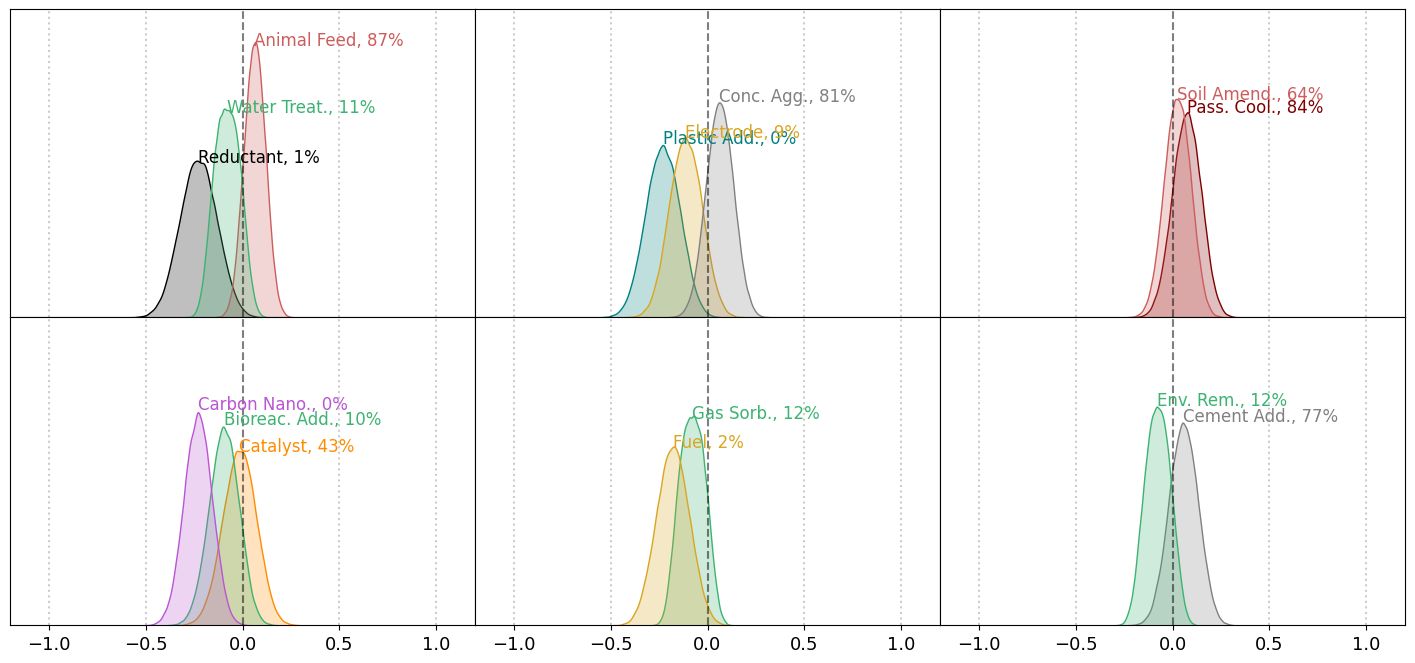

In [8]:
cols = 3
rows = 2
fig, axes = plt.subplots(rows, cols, figsize=(6*cols,4*rows), sharex = True, sharey = True)
plt.subplots_adjust(wspace=0, hspace=0)
listing = [[
    ['Reductant',  'Animal Feed', 'Water Treat.' ],
    [ 'Plastic Add.', 'Electrode',  'Conc. Agg.',  ], 
    ['Pass. Cool.', 'Soil Amend.',]],[
    [ 'Catalyst', 'Bioreac. Add.','Carbon Nano.'], 
    [  'Gas Sorb.','Fuel',  ], 
    ['Cement Add.','Env. Rem.'  ]]]
results = {}
for (i, rws) in zip(range(rows), listing):
    for (j, applications) in zip(range(cols), rws):
        for application in applications:
            results[application] = (pmpas_scores_application[application]['pMPAS'] > 0).mean()
            sns.kdeplot(pmpas_scores_application[application]['pMPAS'], ax = axes[i][j], fill = True , color = clrs[application])
        #plt.xticks(fontsize=14, rotation=90)
            axes[i][j].annotate('{}, {:.0f}%'.format(application, ((pmpas_scores_application[application]['pMPAS'] > 0).mean())*100), 
                xy = (-0.5,4.5), 
             fontsize = 12, #xytext = pmpas_scores_application[application]['pMPAS'].mean(), pmpas_scores_application[application]['pMPAS'] == pmpas_scores_application[application]['pMPAS'].mean(), 
             xytext = (pmpas_scores_application[application]['pMPAS'].mean(),
                       ((pmpas_scores_application[application]['pMPAS'] >= pmpas_scores_application[application]['pMPAS'].mean()-0.005) &
                        (pmpas_scores_application[application]['pMPAS'] <= pmpas_scores_application[application]['pMPAS'].mean()+0.005)).mean()*100),
                #arrowprops = dict(facecolor = 'red'),
             color = clrs[application])
        axes[i][j].set_title('', fontsize=15)
        axes[i][j].set_xlim(-1.2,1.2)
        axes[i][j].set_ylim(0,8)
        axes[i][j].get_yaxis().set_visible(False)
        axes[i][j].axvline(x=0, color='black', linestyle='--', alpha = 0.5)
        axes[i][j].axvline(x=0.5, color='black', linestyle=':', alpha = 0.2)
        axes[i][j].axvline(x=1, color='black', linestyle=':', alpha = 0.2)
        axes[i][j].axvline(x=-0.5, color='black', linestyle=':', alpha = 0.2)
        axes[i][j].axvline(x=-1, color='black', linestyle=':', alpha = 0.2)
        axes[i][j].tick_params('x', labelsize=13)
        
plt.savefig('figS2.svg', bbox_inches = 'tight',pad_inches = 0.01)
plt.savefig('figS2.jpg', bbox_inches = 'tight',pad_inches = 0.01)
df = pd.DataFrame(sorted(results.items(),key=lambda item: item[1], reverse=True), columns=["Application", "pMPAS Score"])
print(df)
df.to_csv('pMPAS_results.csv')